In [1]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth

In [ ]:
df_application_train = pd.read_csv('~/Desktop/proj_data/Kaggle Datasets/application_train.csv')
df_bureau = pd.read_csv('~/Desktop/proj_data/Kaggle Datasets/bureau.csv')
df_bureau_balance = pd.read_csv('~/Desktop/proj_data/Kaggle Datasets/bureau_balance.csv')
df_credit_card_balance = pd.read_csv('~/Desktop/proj_data/Kaggle Datasets/credit_card_balance.csv')
df_installments_payments = pd.read_csv('~/Desktop/proj_data/Kaggle Datasets/installments_payments.csv')
df_POS_CASH_balance = pd.read_csv('~/Desktop/proj_data/Kaggle Datasets/POS_CASH_balance.csv')
df_previous_application = pd.read_csv('~/Desktop/proj_data/Kaggle Datasets/previous_application.csv')
df_data = pd.read_csv('~/Desktop/proj_data/data.csv')

In [ ]:
#len(df_application_train)#head() # 307511
#len(df_bureau) #head() # 1716428
#len(df_bureau_balance)#.head() # 27299925
#len(df_credit_card_balance)#.head() # 3840312
#len(df_installments_payments)#.head() # 13605401
#len(df_POS_CASH_balance)#.head() # 10001358
#len(df_previous_application)#.head() # 1670214

In [2]:
df_data = pd.read_csv('~/Desktop/proj_data/data.csv')
df_target = pd.DataFrame(df_data['TARGET'])
df_data = df_data.select_dtypes(include=['object'])
df_data = pd.concat([df_target, df_data], axis=1)
df_data = df_data.drop(['CODE_GENDER'], axis=1)

In [14]:
df_data.head()

,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,1,Cash loans,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Y,Y,N,Y,Y,N,Laborers,WEDNESDAY,N,N,N,N,N,N,Business Entity Type 3,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
1,0,Cash loans,N,N,Family,State servant,Higher education,Married,House / apartment,Y,Y,N,Y,Y,N,Core staff,MONDAY,N,N,N,N,N,N,School,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
2,0,Revolving loans,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Y,Y,Y,Y,Y,N,Laborers,MONDAY,N,N,N,N,N,N,Government,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
3,0,Cash loans,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Y,Y,N,Y,N,N,Laborers,WEDNESDAY,N,N,N,N,N,N,Business Entity Type 3,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
4,0,Cash loans,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Y,Y,N,Y,N,N,Core staff,THURSDAY,N,N,N,N,Y,Y,Religion,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N


In [ ]:
#df_data.values.sort(axis=0)

In [15]:
pd.options.display.max_columns = None
df_data.select_dtypes(include=['object']).describe()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
unique,2,2,2,7,8,5,6,6,2,2,2,2,2,2,21,7,2,2,2,2,2,2,58,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Cash loans,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Y,Y,N,Y,N,N,Pensioner,TUESDAY,N,N,N,N,N,N,Business Entity Type 3,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
freq,278232,202924,213312,249818,158774,218391,196432,272868,307510,252125,246203,306937,221080,290069,55357,53901,302854,291899,295008,283472,236644,252296,67992,307498,218340,307486,302863,280433,307452,282487,306313,307504,306308,307509,306427,306608,307139,304458,307429,305011,307328,307355,307408


In [3]:
                                                                    #*************************************#
                                                                    #**** Downsampling for Efficiency ****#
                                                                    #*************************************#

y = df_data['TARGET']
X = df_data.drop(['TARGET'], axis=1)

def downsampling_strategy(X, y):
    import numpy as np
    y.columns = ['TARGET']
    X = X.copy(deep=True)
    y = y.copy(deep=True)
    y = y.to_frame(name = 'TARGET')
    random_state = 1
    # balancing the training set
    df = pd.concat([X, y], axis =1)
    defaults = df[df['TARGET'] == 1]
    nominal = df[df['TARGET'] == 0].sample(
        n = np.round(0.5 * (defaults.TARGET.size / 0.5)).astype(int), random_state = random_state)
    # join dataframes and shuffle
    df = pd.concat([defaults, nominal]).sample(frac = 1, random_state = random_state)
    return df

df_down = downsampling_strategy(X, y)

print('Final Data shape: ', df_down.shape,
     'Percent defaults: ', df_down[df_down['TARGET'] == 1].shape[0] / df_down.shape[0])

Final Data shape:  (49650, 44) Percent defaults:  0.5


In [4]:
df_downcode = pd.get_dummies(df_down)
df_downcode.head()

,TARGET,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,...,FLAG_DOCUMENT_17_N,FLAG_DOCUMENT_17_Y,FLAG_DOCUMENT_18_N,FLAG_DOCUMENT_18_Y,FLAG_DOCUMENT_19_N,FLAG_DOCUMENT_19_Y,FLAG_DOCUMENT_20_N,FLAG_DOCUMENT_20_Y,FLAG_DOCUMENT_21_N,FLAG_DOCUMENT_21_Y
288063,0,1,0,1,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
38368,0,1,0,1,0,1,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
288794,1,1,0,1,0,0,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0
268563,1,1,0,1,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
39900,0,1,0,1,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [14]:
df_downcode.shape

(49650, 185)

While further information can be provided upon the client's request, due to the high volume of features, we decided to reduce the feature set for the assocation rule mining process so as to not overwhelm the client with excess information in summary. To account for this, we constructed a random forest decision tree trained toward entropy and performed 100 decision tree repeats using a minimum sample size per split requirement equal to the square root fo the length of the downsampled dataset. From this, we took the most important features for association rule mining. Due to the fact that only categorical variables were provided and unable to be accounted for alongside the numerical features, maximum information from the overall data is limited, henceforth further justifying only a sample of the features with the highest entropy. This model can be refined and modified to account for more variables if the client is interested in this.

In [194]:
%%capture
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import math

y = pd.DataFrame(df_downcode, columns=['TARGET'])
X2 = df_downcode.drop(['TARGET'], axis=1)
X = pd.DataFrame(X2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X1cols = X_train.columns.tolist()
y1cols = y_train.columns.tolist()

model = RandomForestClassifier(n_estimators=100, min_samples_split = round(math.sqrt(len(df_downcode))), criterion="entropy")

# Train
model.fit(X_train, y_train)
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,
                feature_names = X1cols,
                class_names = ['0','1'],
                rounded = True, proportion = False,
                precision = 2, filled = True,
                max_depth = 6)

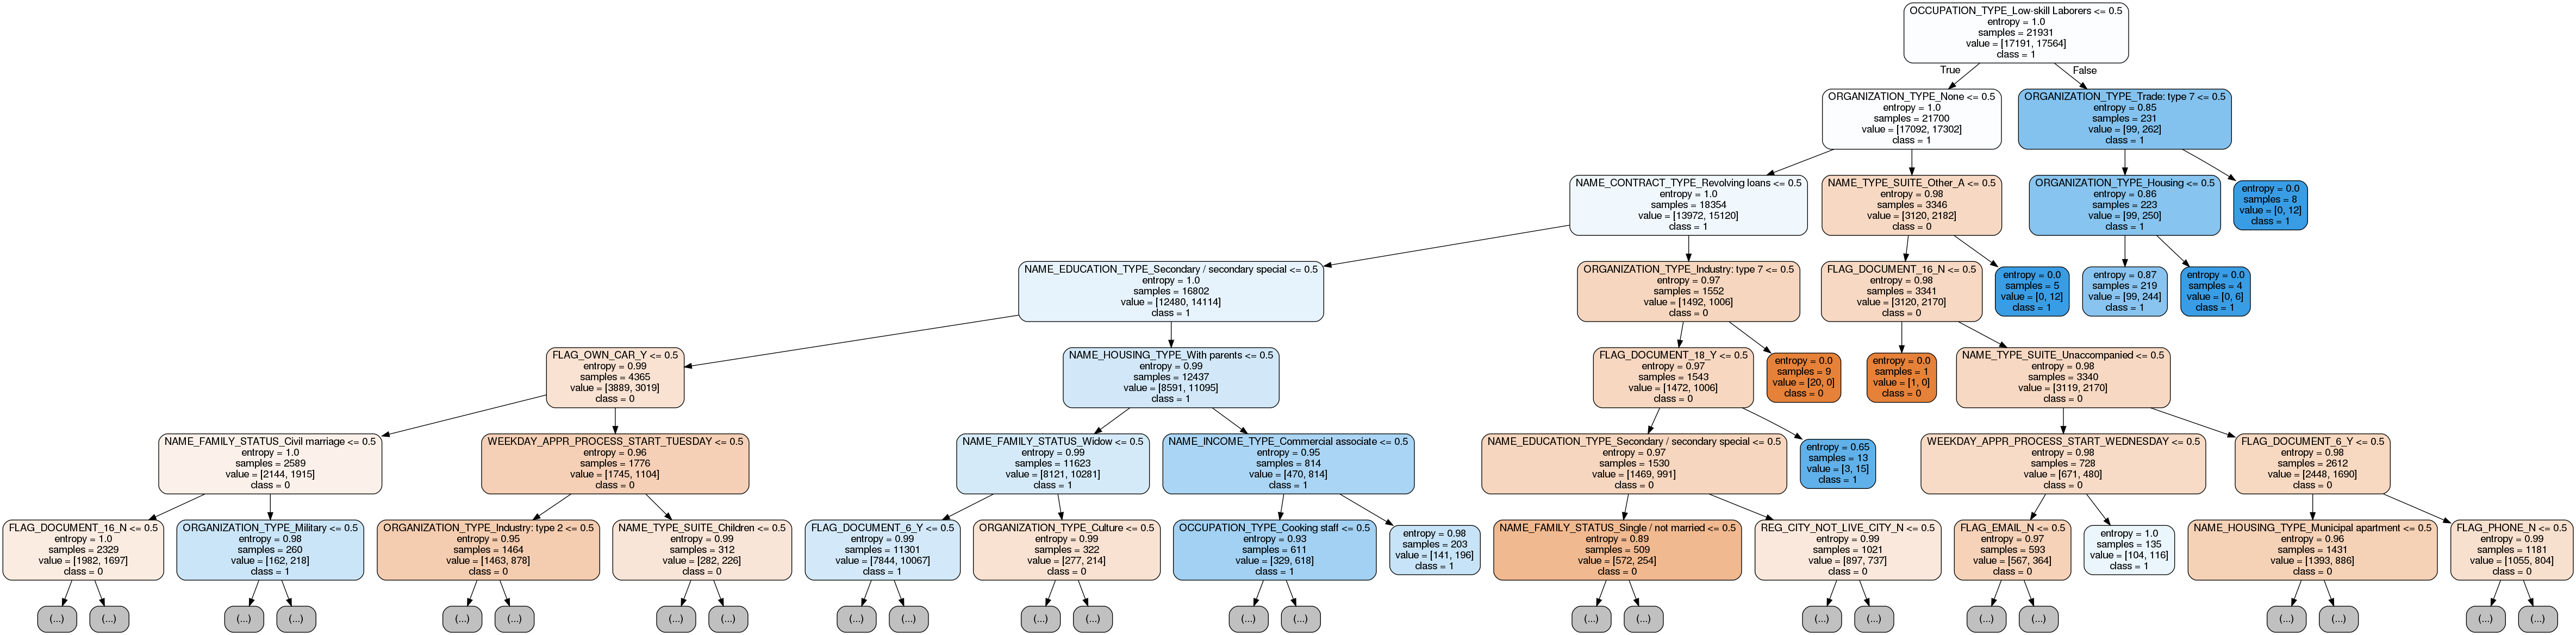

In [195]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('loans.png')
Image(graph.create_png())

#####     #####     #####
# All features displayed in the randomized tree created below were selected for association rule mining with Frequent Pattern Growth, a tree-like 
# structure made with initial itemsets of the database

In [78]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4969452836522323


In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.54      0.52      7381
           1       0.50      0.45      0.48      7514

   micro avg       0.50      0.50      0.50     14895
   macro avg       0.50      0.50      0.50     14895
weighted avg       0.50      0.50      0.50     14895



Decision Tree

In [6]:
df_downcode_keep = df_downcode[['TARGET','FLAG_DOCUMENT_14_Y','FLAG_DOCUMENT_15_Y','FLAG_DOCUMENT_3_N','FLAG_DOCUMENT_3_Y','FLAG_DOCUMENT_3_Y','FLAG_DOCUMENT_8_N','FLAG_EMAIL_N','FLAG_EMAIL_N','FLAG_OWN_CAR_Y','FLAG_OWN_CAR_Y','FLAG_OWN_REALTY_Y','FLAG_WORK_PHONE_N','FLAG_WORK_PHONE_N','LIVE_CITY_NOT_WORK_CITY_N','NAME_CONTRACT_TYPE_Cash loans','NAME_CONTRACT_TYPE_Revolving loans','NAME_EDUCATION_TYPE_Higher education','NAME_EDUCATION_TYPE_Higher education','NAME_EDUCATION_TYPE_Incomplete higher','NAME_FAMILY_STATUS_Married','NAME_FAMILY_STATUS_Single / not married','NAME_FAMILY_STATUS_Widow','NAME_HOUSING_TYPE_House / apartment','NAME_HOUSING_TYPE_Office apartment','NAME_HOUSING_TYPE_Rented apartment','NAME_INCOME_TYPE_Commercial associate','NAME_INCOME_TYPE_Pensioner','NAME_INCOME_TYPE_State servant','NAME_INCOME_TYPE_Unemployed','NAME_INCOME_TYPE_Working','NAME_TYPE_SUITE_Family','NAME_TYPE_SUITE_Other_A','OCCUPATION_TYPE_Cooking staff','OCCUPATION_TYPE_Core staff','OCCUPATION_TYPE_Drivers','OCCUPATION_TYPE_High skill tech staff','OCCUPATION_TYPE_Laborers','OCCUPATION_TYPE_Low-skill Laborers','OCCUPATION_TYPE_Pensioner','OCCUPATION_TYPE_Private service staff','OCCUPATION_TYPE_Sales staff','OCCUPATION_TYPE_Unknown','OCCUPATION_TYPE_Waiters/barmen staff','ORGANIZATION_TYPE_Bank','ORGANIZATION_TYPE_Construction','ORGANIZATION_TYPE_Industry: type 10','ORGANIZATION_TYPE_Industry: type 11','ORGANIZATION_TYPE_Industry: type 3','ORGANIZATION_TYPE_Industry: type 7','ORGANIZATION_TYPE_Industry: type 9','ORGANIZATION_TYPE_Military','ORGANIZATION_TYPE_University','ORGANIZATION_TYPE_Police','ORGANIZATION_TYPE_Security','ORGANIZATION_TYPE_University','REG_CITY_NOT_LIVE_CITY_N','REG_CITY_NOT_LIVE_CITY_N','REG_CITY_NOT_LIVE_CITY_Y','REG_CITY_NOT_LIVE_CITY_Y','REG_CITY_NOT_WORK_CITY_N','REG_REGION_NOT_LIVE_REGION_N','WEEKDAY_APPR_PROCESS_START_THURSDAY','WEEKDAY_APPR_PROCESS_START_TUESDAY','WEEKDAY_APPR_PROCESS_START_WEDNESDAY']]

In [91]:
df_downcode_keep.head()

,TARGET,FLAG_DOCUMENT_15_Y,FLAG_DOCUMENT_3_N,FLAG_DOCUMENT_3_Y,FLAG_DOCUMENT_3_Y,FLAG_DOCUMENT_8_N,FLAG_EMAIL_N,FLAG_EMAIL_N,FLAG_OWN_CAR_Y,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,FLAG_WORK_PHONE_N,FLAG_WORK_PHONE_N,LIVE_CITY_NOT_WORK_CITY_N,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Other_A,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Pensioner,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Unknown,OCCUPATION_TYPE_Waiters/barmen staff,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_University,REG_CITY_NOT_LIVE_CITY_N,REG_CITY_NOT_LIVE_CITY_N,REG_CITY_NOT_LIVE_CITY_Y,REG_CITY_NOT_LIVE_CITY_Y,REG_CITY_NOT_WORK_CITY_N,REG_REGION_NOT_LIVE_REGION_N,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
288063,0,0,0,1,1,1,1,1,0,0,1,1,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0
38368,0,0,0,1,1,1,1,1,0,0,0,1,1,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
288794,1,0,0,1,1,1,1,1,0,0,1,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
268563,1,0,0,1,1,1,1,1,0,0,1,1,1,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1
39900,0,0,0,1,1,1,1,1,0,0,1,1,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0


In [92]:
df_downcode_keep.describe()

,TARGET,FLAG_DOCUMENT_15_Y,FLAG_DOCUMENT_3_N,FLAG_DOCUMENT_3_Y,FLAG_DOCUMENT_3_Y,FLAG_DOCUMENT_8_N,FLAG_EMAIL_N,FLAG_EMAIL_N,FLAG_OWN_CAR_Y,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,FLAG_WORK_PHONE_N,FLAG_WORK_PHONE_N,LIVE_CITY_NOT_WORK_CITY_N,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Other_A,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Pensioner,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Unknown,OCCUPATION_TYPE_Waiters/barmen staff,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_University,REG_CITY_NOT_LIVE_CITY_N,REG_CITY_NOT_LIVE_CITY_N,REG_CITY_NOT_LIVE_CITY_Y,REG_CITY_NOT_LIVE_CITY_Y,REG_CITY_NOT_WORK_CITY_N,REG_REGION_NOT_LIVE_REGION_N,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
count,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000
mean,0.500000,0.000604,0.257825,0.742175,0.742175,0.923021,0.943364,0.943364,0.322759,0.322759,0.690171,0.783182,0.783182,0.800785,0.919295,0.080705,0.205478,0.205478,0.033233,0.623625,0.160745,0.045398,0.872306,0.007936,0.019758,0.225136,0.153172,0.060342,0.000181,0.561007,0.127311,0.002759,0.022115,0.080483,0.070937,0.033877,0.206022,0.010151,0.153132,0.007734,0.113233,0.133333,0.005116,0.006989,0.025881,0.000342,0.009225,0.012870,0.004713,0.010413,0.007069,0.003404,0.006244,0.011762,0.003404,0.904048,0.904048,0.095952,0.095952,0.736052,0.984250,0.163223,0.177543,0.168379
std,0.500005,0.024574,0.437441,0.437441,0.437441,0.266561,0.231149,0.231149,0.467536,0.467536,0.462428,0.412082,0.412082,0.399414,0.272384,0.272384,0.404055,0.404055,0.179245,0.484481,0.367299,0.208177,0.333752,0.088728,0.139170,0.417676,0.360157,0.238123,0.013463,0.496269,0.333325,0.052457,0.147058,0.272043,0.256721,0.180915,0.404451,0.100241,0.360118,0.087604,0.316880,0.339938,0.071342,0.083308,0.158782,0.018501,0.095602,0.112715,0.068490,0.101512,0.083783,0.058244,0.078771,0.107816,0.058244,0.294528,0.294528,0.294528,0.294528,0.440776,0.124509,0.369572,0.382131,0.374206
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [7]:
df_non_defaulted = df_downcode_keep[df_downcode_keep['TARGET'] == 0]
df_defaulted = df_downcode_keep[df_downcode_keep['TARGET'] == 1]
df_non_defaulted_final = df_non_defaulted.drop(['TARGET'], axis=1)
df_defaulted_final = df_defaulted.drop(['TARGET'], axis=1)

In [126]:
# import pandas as pd
# from mlxtend.preprocessing import TransactionEncoder

# te = TransactionEncoder()
# te_ary = te.fit(df_downcode_keep).transform(df_downcode_keep)
# df_downcode_non_defaulted = pd.DataFrame(te_ary, columns=te.columns_) # Colnames need to be mapped back to the original one-hot encoded dataframe colnames

# te = TransactionEncoder()
# te_ary = te.fit(df_defaulted_final).transform(df_defaulted_final)
# df_downcode_defaulted = pd.DataFrame(te_ary, columns=te.columns_) # Colnames here also need to be mapped back to the original one-hot encoded dataframe colnames

In [112]:
# from mlxtend.frequent_patterns import fpgrowth

# i = 0
# j = 100
# frame_non_defaulted = pd.DataFrame()

# for code in range(0,len(df_downcode_non_defaulted)):
#     grow = fpgrowth(df_downcode_non_defaulted[i:j], min_support=0.35, use_colnames=True, max_len = None, verbose=None)
#     i=i+200
#     j=j+200
#     frame_non_defaulted = frame_non_defaulted.append(grow, ignore_index=True)

In [ ]:
# print(frame_non_defaulted.head(25))

In [8]:
df_non_defaulted_final = df_non_defaulted_final.applymap(lambda x: True if x==1 else x)
df_non_defaulted_final = df_non_defaulted_final.applymap(lambda x: False if x==0 else x)

df_defaulted_final = df_defaulted_final.applymap(lambda x: True if x==1 else x)
df_defaulted_final = df_defaulted_final.applymap(lambda x: False if x==0 else x)

In [9]:
df_defaulted_final.shape

(24825, 64)

The results of the association rule mining process indicate there is not much difference in itemsets between applicants that default on loans and those that do not. Both loan defaulters and non-defaulters have many similar associations in the categorical data.

### Itemsets of associated features from the non-defaulted dataset:

In [11]:
noDefault = fpgrowth(df_non_defaulted_final, min_support=0.80, use_colnames=True, max_len = None, verbose=None).iloc[10:30, :] # The first 10 are all single item itemsets
print(noDefault)

     support                                           itemsets
10  0.823243                        (LIVE_CITY_NOT_WORK_CITY_N)
11  0.929426       (REG_REGION_NOT_LIVE_REGION_N, FLAG_EMAIL_N)
12  0.942075                                     (FLAG_EMAIL_N)
13  0.929426       (REG_REGION_NOT_LIVE_REGION_N, FLAG_EMAIL_N)
14  0.929426       (REG_REGION_NOT_LIVE_REGION_N, FLAG_EMAIL_N)
15  0.924149  (REG_REGION_NOT_LIVE_REGION_N, REG_CITY_NOT_LI...
16  0.873877           (REG_CITY_NOT_LIVE_CITY_N, FLAG_EMAIL_N)
17  0.873877           (REG_CITY_NOT_LIVE_CITY_N, FLAG_EMAIL_N)
18  0.871823  (REG_REGION_NOT_LIVE_REGION_N, REG_CITY_NOT_LI...
19  0.873877           (REG_CITY_NOT_LIVE_CITY_N, FLAG_EMAIL_N)
20  0.871823  (REG_REGION_NOT_LIVE_REGION_N, REG_CITY_NOT_LI...
21  0.871823  (REG_REGION_NOT_LIVE_REGION_N, REG_CITY_NOT_LI...
22  0.926485                         (REG_CITY_NOT_LIVE_CITY_N)
23  0.924149  (REG_REGION_NOT_LIVE_REGION_N, REG_CITY_NOT_LI...
24  0.873877           (REG_CITY_NOT_LIV

### Itemsets of associated features from the defaulted dataset:

In [13]:
default = fpgrowth(df_defaulted_final, min_support=0.80, use_colnames=True, max_len = None, verbose=None).iloc[10:30, :] # The first 10 are all single item itemsets
print(default)

     support                                           itemsets
10  0.928701       (REG_REGION_NOT_LIVE_REGION_N, FLAG_EMAIL_N)
11  0.928701       (REG_REGION_NOT_LIVE_REGION_N, FLAG_EMAIL_N)
12  0.919517  (REG_REGION_NOT_LIVE_REGION_N, NAME_CONTRACT_T...
13  0.882538      (NAME_CONTRACT_TYPE_Cash loans, FLAG_EMAIL_N)
14  0.882538      (NAME_CONTRACT_TYPE_Cash loans, FLAG_EMAIL_N)
15  0.867996  (REG_REGION_NOT_LIVE_REGION_N, NAME_CONTRACT_T...
16  0.882538      (NAME_CONTRACT_TYPE_Cash loans, FLAG_EMAIL_N)
17  0.867996  (REG_REGION_NOT_LIVE_REGION_N, NAME_CONTRACT_T...
18  0.867996  (REG_REGION_NOT_LIVE_REGION_N, NAME_CONTRACT_T...
19  0.910655  (REG_REGION_NOT_LIVE_REGION_N, FLAG_DOCUMENT_8_N)
20  0.876858                  (FLAG_DOCUMENT_8_N, FLAG_EMAIL_N)
21  0.876858                  (FLAG_DOCUMENT_8_N, FLAG_EMAIL_N)
22  0.862115  (NAME_CONTRACT_TYPE_Cash loans, FLAG_DOCUMENT_...
23  0.862638  (REG_REGION_NOT_LIVE_REGION_N, FLAG_DOCUMENT_8...
24  0.876858                  (FLAG_DOCU

In [ ]:
# End

In [ ]:
# of

In [ ]:
# Association

In [ ]:
# Rule

In [ ]:
# Mining

In [ ]:
                        ########################################################################################################################
                            #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@#
                                #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@#
                                    #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@#
                                        #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@#
                                            #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@#
                                                #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@#
                                                    #@@@@@@@@@@@@@@@@ EXIT-ASSOCIATION-RULE-MINING @@@@@@@@@@@@@@@@#
                                                #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@#
                                            #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@#
                                        #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@#
                                    #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@#
                                #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@#
                            #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@#
                        ########################################################################################################################

In [ ]:
# To try FP Growth on all 185 columns, run code below:

In [196]:
df_downcode

df_non_defaulted = df_downcode[df_downcode['TARGET'] == 0]
df_defaulted = df_downcode[df_downcode['TARGET'] == 1]
df_non_defaulted_final = df_non_defaulted.drop(['TARGET'], axis=1)
df_defaulted_final = df_defaulted.drop(['TARGET'], axis=1)

df_non_defaulted_final = df_non_defaulted_final.applymap(lambda x: True if x==1 else x)
df_non_defaulted_final = df_non_defaulted_final.applymap(lambda x: False if x==0 else x)

df_defaulted_final = df_defaulted_final.applymap(lambda x: True if x==1 else x)
df_defaulted_final = df_defaulted_final.applymap(lambda x: False if x==0 else x)

In [ ]:
noDefault = fpgrowth(df_non_defaulted_final, min_support=0.80, use_colnames=True, max_len = None, verbose=None).iloc[10:30, :] # The first 10 are all single item itemsets
print(noDefault)

In [ ]:
default = fpgrowth(df_defaulted_final, min_support=0.80, use_colnames=True, max_len = None, verbose=None).iloc[10:30, :] # The first 10 are all single item itemsets
print(default)

In [ ]:
# These results are from the main procedure's "default" model (not the one using 185 columns)

In [19]:
default.columns

Index(['support', 'itemsets'], dtype='object')

In [47]:
default['itemsets']

10         (REG_REGION_NOT_LIVE_REGION_N, FLAG_EMAIL_N)
11         (REG_REGION_NOT_LIVE_REGION_N, FLAG_EMAIL_N)
12    (REG_REGION_NOT_LIVE_REGION_N, NAME_CONTRACT_T...
13        (NAME_CONTRACT_TYPE_Cash loans, FLAG_EMAIL_N)
14        (NAME_CONTRACT_TYPE_Cash loans, FLAG_EMAIL_N)
15    (REG_REGION_NOT_LIVE_REGION_N, NAME_CONTRACT_T...
16        (NAME_CONTRACT_TYPE_Cash loans, FLAG_EMAIL_N)
17    (REG_REGION_NOT_LIVE_REGION_N, NAME_CONTRACT_T...
18    (REG_REGION_NOT_LIVE_REGION_N, NAME_CONTRACT_T...
19    (REG_REGION_NOT_LIVE_REGION_N, FLAG_DOCUMENT_8_N)
20                    (FLAG_DOCUMENT_8_N, FLAG_EMAIL_N)
21                    (FLAG_DOCUMENT_8_N, FLAG_EMAIL_N)
22    (NAME_CONTRACT_TYPE_Cash loans, FLAG_DOCUMENT_...
23    (REG_REGION_NOT_LIVE_REGION_N, FLAG_DOCUMENT_8...
24                    (FLAG_DOCUMENT_8_N, FLAG_EMAIL_N)
25    (REG_REGION_NOT_LIVE_REGION_N, FLAG_DOCUMENT_8...
26    (REG_REGION_NOT_LIVE_REGION_N, FLAG_DOCUMENT_8...
27    (REG_REGION_NOT_LIVE_REGION_N, NAME_CONTRA

In [ ]:
from IPython.display import display, HTML
print(tempVar)
display(tempVar)
#display(HTML(tempVar.to_html()))


import ipywidgets as widgets
from IPython import display
import pandas as pd
import numpy as np

# sample data
tempVar = pd.DataFrame(np.random.randn(8, 3))
tempVar = pd.DataFrame(np.random.randn(8, 3))

# create output widgets
widget1 = widgets.Output()
widget2 = widgets.Output()

# render in output widgets
with widget1:
    display.display(df1)
with widget2:
    display.display(df2)

# create HBox
hbox = widgets.HBox([widget1, widget2])

# render hbox
hbox

In [149]:
r = fpgrowth(df_non_defaulted_final, min_support=0.80, use_colnames=True, max_len = None, verbose=None)

In [ ]:
#r['itemsets']
r[len(r.iloc[:, 1]) < 1]

We needed to drop job names that are unable to convey much meaning to the client. Therefore, we will drop "unknown," "core staff," and "cooking staff" from OCCUPATION_TYPE. We performed the same step for "ORGANIZATION_TYPE" by dropping observations with the value "other".

We then consolidated ORGANIZATION_TYPE values into groupings that would be useful to our client, but consolidate enough one-hot encoded parameters to enable the association rule mining algorithm to provide useful findings. Through this process, we reduced 58 variables down to 28. Doing the same for OCCUPATION_TYPE reduced this feature's unique values from 21 to 9. We further applied this recoding to NAME_INCOME_TYPE, NAME_FAMILY_STATUS, NAME_EDUCATION_TYPE, and NAME_TYPE_SUITE as well.


We are also dropping WEEKDAY_APPR_PROCESS_START because it adds seven additional parameters to the model and was also discovered to be insignificant in previous model feature importance assessments, including both random forest and logistic regression. Therefore, providing our client with details on the weekday of application when this variable is insignificant would be misleading and unprofitable.

In [40]:
# df_data = df_data.drop(columns=['FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9'
#                               ,'FLAG_DOCUMENT_10','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16'
#                               ,'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'], axis=1)

#                                                 ##################################################
#                                                 #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#
#                                                 #         Recodes for ORGANIZATION_TYPE          #
#                                                 #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#
#                                                 ##################################################

# df_data.drop(df_data[df_data['ORGANIZATION_TYPE'] == 'Other'].index, inplace=True)
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Postal'), 'ORGANIZATION_TYPE'] = 'Government'

# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Business Entity Type 3'), 'ORGANIZATION_TYPE'] = 'Business Sector'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Business Entity Type 2'), 'ORGANIZATION_TYPE'] = 'Business Sector'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Business Entity Type 1'), 'ORGANIZATION_TYPE'] = 'Business Sector'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Bank'), 'ORGANIZATION_TYPE'] = 'Business Sector'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Advertising'), 'ORGANIZATION_TYPE'] = 'Business Sector'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Insurance'), 'ORGANIZATION_TYPE'] = 'Business Sector'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Bank'), 'ORGANIZATION_TYPE'] = 'Business Sector'

# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Transport: type 1'), 'ORGANIZATION_TYPE'] = 'Transport'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Transport: type 2'), 'ORGANIZATION_TYPE'] = 'Transport'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Transport: type 3'), 'ORGANIZATION_TYPE'] = 'Transport'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Transport: type 4'), 'ORGANIZATION_TYPE'] = 'Transport'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Transport: type 5'), 'ORGANIZATION_TYPE'] = 'Transport'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Transport: type 6'), 'ORGANIZATION_TYPE'] = 'Transport'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Transport: type 7'), 'ORGANIZATION_TYPE'] = 'Transport'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Transport: type 8'), 'ORGANIZATION_TYPE'] = 'Transport'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Transport: type 9'), 'ORGANIZATION_TYPE'] = 'Transport'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Transport: type 10'), 'ORGANIZATION_TYPE'] = 'Transport'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Transport: type 11'), 'ORGANIZATION_TYPE'] = 'Transport'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Transport: type 12'), 'ORGANIZATION_TYPE'] = 'Transport'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Transport: type 13'), 'ORGANIZATION_TYPE'] = 'Transport'

# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Industry: type 1'), 'ORGANIZATION_TYPE'] = 'Industry'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Industry: type 2'), 'ORGANIZATION_TYPE'] = 'Industry'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Industry: type 3'), 'ORGANIZATION_TYPE'] = 'Industry'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Industry: type 4'), 'ORGANIZATION_TYPE'] = 'Industry'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Industry: type 5'), 'ORGANIZATION_TYPE'] = 'Industry'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Industry: type 6'), 'ORGANIZATION_TYPE'] = 'Industry'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Industry: type 7'), 'ORGANIZATION_TYPE'] = 'Industry'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Industry: type 8'), 'ORGANIZATION_TYPE'] = 'Industry'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Industry: type 9'), 'ORGANIZATION_TYPE'] = 'Industry'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Industry: type 10'), 'ORGANIZATION_TYPE'] = 'Industry'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Industry: type 11'), 'ORGANIZATION_TYPE'] = 'Industry'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Industry: type 12'), 'ORGANIZATION_TYPE'] = 'Industry'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Industry: type 13'), 'ORGANIZATION_TYPE'] = 'Industry'

# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Trade: type 1'), 'ORGANIZATION_TYPE'] = 'Trade'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Trade: type 2'), 'ORGANIZATION_TYPE'] = 'Trade'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Trade: type 3'), 'ORGANIZATION_TYPE'] = 'Trade'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Trade: type 4'), 'ORGANIZATION_TYPE'] = 'Trade'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Trade: type 5'), 'ORGANIZATION_TYPE'] = 'Trade'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Trade: type 6'), 'ORGANIZATION_TYPE'] = 'Trade'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Trade: type 7'), 'ORGANIZATION_TYPE'] = 'Trade'

# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Security Ministries'), 'ORGANIZATION_TYPE'] = 'Security'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Military'), 'ORGANIZATION_TYPE'] = 'Security'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Police'), 'ORGANIZATION_TYPE'] = 'Security'
# df_data.loc[(df_data.ORGANIZATION_TYPE == 'Security'), 'ORGANIZATION_TYPE'] = 'Security'

#                                                 ##################################################
#                                                 #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#
#                                                 #          Recodes for OCCUPATION_TYPE           #
#                                                 #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#
#                                                 ##################################################

# df_data.drop(df_data[df_data['OCCUPATION_TYPE'].isin(['Unknown','Core staff'])].index, inplace=True)                    
# df_data.loc[(df_data.OCCUPATION_TYPE == 'Accountants'), 'OCCUPATION_TYPE'] = 'High Skilled Workers & Management'
# df_data.loc[(df_data.OCCUPATION_TYPE == 'Managers'), 'OCCUPATION_TYPE'] = 'High Skilled Workers & Management'
# df_data.loc[(df_data.OCCUPATION_TYPE == 'High skill tech staff'), 'OCCUPATION_TYPE'] = 'High Skilled Workers & Management'
# df_data.loc[(df_data.OCCUPATION_TYPE == 'IT staff'), 'OCCUPATION_TYPE'] = 'High Skilled Workers & Management'
# df_data.loc[(df_data.OCCUPATION_TYPE == 'HR staff'), 'OCCUPATION_TYPE'] = 'High Skilled Workers & Management'

# df_data.loc[(df_data.OCCUPATION_TYPE == 'Laborers'), 'OCCUPATION_TYPE'] = 'Low Skilled Workers'
# df_data.loc[(df_data.OCCUPATION_TYPE == 'Drivers'), 'OCCUPATION_TYPE'] = 'Low Skilled Workers'
# df_data.loc[(df_data.OCCUPATION_TYPE == 'Sales staff'), 'OCCUPATION_TYPE'] = 'Low Skilled Workers'
# df_data.loc[(df_data.OCCUPATION_TYPE == 'Cleaning staff'), 'OCCUPATION_TYPE'] = 'Low Skilled Workers'
# df_data.loc[(df_data.OCCUPATION_TYPE == 'Cooking staff'), 'OCCUPATION_TYPE'] = 'Low Skilled Workers'
# df_data.loc[(df_data.OCCUPATION_TYPE == 'Waiters/barmen staff'), 'OCCUPATION_TYPE'] = 'Low Skilled Workers'
# df_data.loc[(df_data.OCCUPATION_TYPE == 'Low-skill Laborers'), 'OCCUPATION_TYPE'] = 'Low Skilled Workers'
# df_data.loc[(df_data.OCCUPATION_TYPE == 'Realty agents'), 'OCCUPATION_TYPE'] = 'Low Skilled Workers'
# df_data.loc[(df_data.OCCUPATION_TYPE == 'Secretaries'), 'OCCUPATION_TYPE'] = 'Low Skilled Workers'

#                                                 ##################################################
#                                                 #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#
#                                                 #         Recodes for NAME_INCOME_TYPE           #
#                                                 #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#
#                                                 ##################################################

# df_data.loc[(df_data.NAME_INCOME_TYPE == 'Unemployed'), 'NAME_INCOME_TYPE'] = 'Not_Working'
# df_data.loc[(df_data.NAME_INCOME_TYPE == 'Maternity leave'), 'NAME_INCOME_TYPE'] = 'Not_Working'
# df_data.loc[(df_data.NAME_INCOME_TYPE == 'State servant'), 'NAME_INCOME_TYPE'] = 'Working'
# df_data.loc[(df_data.NAME_INCOME_TYPE == 'Commercial associate'), 'NAME_INCOME_TYPE'] = 'Working'
# df_data.loc[(df_data.NAME_INCOME_TYPE == 'Businessman'), 'NAME_INCOME_TYPE'] = 'Working'

# df_data.loc[(df_data.NAME_FAMILY_STATUS == 'Single / not married'), 'NAME_FAMILY_STATUS'] = 'Not Married'
# df_data.loc[(df_data.NAME_FAMILY_STATUS == 'Widow'), 'NAME_FAMILY_STATUS'] = 'Not Married'
# df_data.loc[(df_data.NAME_FAMILY_STATUS == 'Separated'), 'NAME_FAMILY_STATUS'] = 'Not Married'
# df_data.loc[(df_data.NAME_FAMILY_STATUS == 'Civil marriage'), 'NAME_FAMILY_STATUS'] = 'Married'

# df_data.loc[(df_data.NAME_EDUCATION_TYPE == 'Secondary / secondary special'), 'NAME_EDUCATION_TYPE'] = 'Secondary Education'
# df_data.loc[(df_data.NAME_EDUCATION_TYPE == 'Incomplete higher'), 'NAME_EDUCATION_TYPE'] = 'Secondary Education'
# df_data.loc[(df_data.NAME_EDUCATION_TYPE == 'Lower secondary'), 'NAME_EDUCATION_TYPE'] = 'Secondary Education'
# df_data.loc[(df_data.NAME_EDUCATION_TYPE == 'Higher education'), 'NAME_EDUCATION_TYPE'] = 'Higher Education'
# df_data.loc[(df_data.NAME_EDUCATION_TYPE == 'Academic degree'), 'NAME_EDUCATION_TYPE'] = 'Higher Education'
    
#                                                 ##################################################
#                                                 #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#
#                                                 #          Recodes for NAME_TYPE_SUITE           #
#                                                 #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#
#                                                 ##################################################
                    
# df_data.loc[(df_data.NAME_TYPE_SUITE == 'Spouse, partner'), 'NAME_TYPE_SUITE'] = 'Family and Groups of People'
# df_data.loc[(df_data.NAME_TYPE_SUITE == 'Children'), 'NAME_TYPE_SUITE'] = 'Family and Groups of People'
# df_data.loc[(df_data.NAME_TYPE_SUITE == 'Group of people'), 'NAME_TYPE_SUITE'] = 'Family and Groups of People'
# df_data.loc[(df_data.NAME_TYPE_SUITE == 'Family'), 'NAME_TYPE_SUITE'] = 'Family and Groups of People'
# df_data.loc[(df_data.NAME_TYPE_SUITE == 'Other_A'), 'NAME_TYPE_SUITE'] = 'Other'
# df_data.loc[(df_data.NAME_TYPE_SUITE == 'Other_B'), 'NAME_TYPE_SUITE'] = 'Other'

#                                                 ##################################################
#                                                 #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#
#                                                 #         Recodes for NAME_HOUSING_TYPE          #
#                                                 #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#
#                                                 ##################################################
                    
# df_data.loc[(df_data.NAME_HOUSING_TYPE == 'Municipal apartment'), 'NAME_HOUSING_TYPE'] = 'Public Housing'
# df_data.loc[(df_data.NAME_HOUSING_TYPE == 'House / apartment'), 'NAME_HOUSING_TYPE'] = 'House or Condo'
# df_data.loc[(df_data.NAME_HOUSING_TYPE == 'Rented apartment'), 'NAME_HOUSING_TYPE'] = 'Apartment'
# df_data.loc[(df_data.NAME_HOUSING_TYPE == 'With parents'), 'NAME_HOUSING_TYPE'] = 'Co-Habitation'
# df_data.loc[(df_data.NAME_HOUSING_TYPE == 'Co-op apartment'), 'NAME_HOUSING_TYPE'] = 'Co-Habitation'

In [26]:
df_orgtype = pd.DataFrame(df_data['ORGANIZATION_TYPE'].unique()) # 58 unique
df_orgtype.values.sort(axis=0)

In [ ]:
df_orgtype
#df_orgtype.tail(28)

In [80]:
df_data.select_dtypes(include=['object']).describe()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
unique,2,2,2,7,8,5,6,6,2,2,2,2,2,2,21,7,2,2,2,2,2,2,58,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Cash loans,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Y,Y,N,Y,N,N,Pensioner,TUESDAY,N,N,N,N,N,N,Business Entity Type 3,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
freq,278232,202924,213312,249818,158774,218391,196432,272868,307510,252125,246203,306937,221080,290069,55357,53901,302854,291899,295008,283472,236644,252296,67992,307498,218340,307486,302863,280433,307452,282487,306313,307504,306308,307509,306427,306608,307139,304458,307429,305011,307328,307355,307408


In [45]:
df_data.shape

(228167, 72)

In [26]:
df_data.select_dtypes(include=['object']).head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Y,Y,N,Y,Y,N,Laborers,WEDNESDAY,N,N,N,N,N,N,Business Entity Type 3,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Y,Y,N,Y,Y,N,Core staff,MONDAY,N,N,N,N,N,N,School,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Y,Y,Y,Y,Y,N,Laborers,MONDAY,N,N,N,N,N,N,Government,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Y,Y,N,Y,N,N,Laborers,WEDNESDAY,N,N,N,N,N,N,Business Entity Type 3,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Y,Y,N,Y,N,N,Core staff,THURSDAY,N,N,N,N,Y,Y,Religion,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N


In [ ]:
df_chars = df_data.drop(['TARGET'])
df_target = df_data['TARGET']
df_char01 = pd.concat([df_target, df_chars], axis=1)

In [56]:
                                        ##########################################################################
                                        #************************************************************************#
                                        # Need to have some clustering here to consolidate categorical variables #
                                        #************************************************************************#
                                        ##########################################################################

In [50]:
# get dummies for fp growth rule association mining
df_char_encode = pd.get_dummies(df_char01)
df_char_encode.head()

,TARGET,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,FLAG_MOBIL_N,FLAG_MOBIL_Y,FLAG_EMP_PHONE_N,FLAG_EMP_PHONE_Y,FLAG_WORK_PHONE_N,FLAG_WORK_PHONE_Y,FLAG_CONT_MOBILE_N,FLAG_CONT_MOBILE_Y,FLAG_PHONE_N,FLAG_PHONE_Y,FLAG_EMAIL_N,FLAG_EMAIL_Y,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_None,OCCUPATION_TYPE_Pensioner,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Unknown,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,REG_REGION_NOT_LIVE_REGION_N,REG_REGION_NOT_LIVE_REGION_Y,REG_REGION_NOT_WORK_REGION_N,REG_REGION_NOT_WORK_REGION_Y,LIVE_REGION_NOT_WORK_REGION_N,LIVE_REGION_NOT_WORK_REGION_Y,REG_CITY_NOT_LIVE_CITY_N,REG_CITY_NOT_LIVE_CITY_Y,REG_CITY_NOT_WORK_CITY_N,REG_CITY_NOT_WORK_CITY_Y,LIVE_CITY_NOT_WORK_CITY_N,LIVE_CITY_NOT_WORK_CITY_Y,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_None,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORG

In [51]:
df_char01.shape

(307511, 44)

In [52]:
df_char_encode.shape

(307511, 189)

After removing unnecessary variables in a first-pass, we then performed a second pass since we only want to provide the most high-level itemsets that will generate the most profit.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X_train, y_train)
estimator = model.estimators_[5]
from sklearn.tree import export_graphviz
# Export as dot file
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data, 
                feature_names = X1cols,
                class_names = ['0','1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('loans.png')
Image(graph.create_png())

In [ ]:
### If the random forest immediately above doesn't work, try this one:
# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X1cols,
                class_names = ['0','1'],
                rounded = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

Random Forest:

Because we are applying association rule mining to each target variable value, we constructed a decision tree to identify the significant splits, which will allow us to more practically encode variables so we can derive useful association rules for our itemsets that will provide use to our customer rather than creating an overly-finite (too specific) set of features for association rule mining. While the latter will provide more information, the former will provide more useful information.

In [135]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from sklearn.metrics import classification_report
import math

y1 = pd.DataFrame(df_char_encode, columns=['TARGET'])
X2 = df_char_encode.drop(['TARGET'], axis=1)
X1 = pd.DataFrame(X2)

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3)

X1cols = X_train.columns.tolist()
y1cols = y_train.columns.tolist()

bigtree = tree.DecisionTreeClassifier(max_depth = 10, min_samples_split = round(40*math.sqrt(len(X1))), criterion="entropy")
bigtree_fit = bigtree.fit(X_train,y_train)
y_pred = bigtree_fit.predict(X_test)

print(classification_report(y_test, y_pred));

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84812
           1       0.00      0.00      0.00      7442

   micro avg       0.92      0.92      0.92     92254
   macro avg       0.46      0.50      0.48     92254
weighted avg       0.85      0.92      0.88     92254



/home/pablo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [136]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9193314111041255


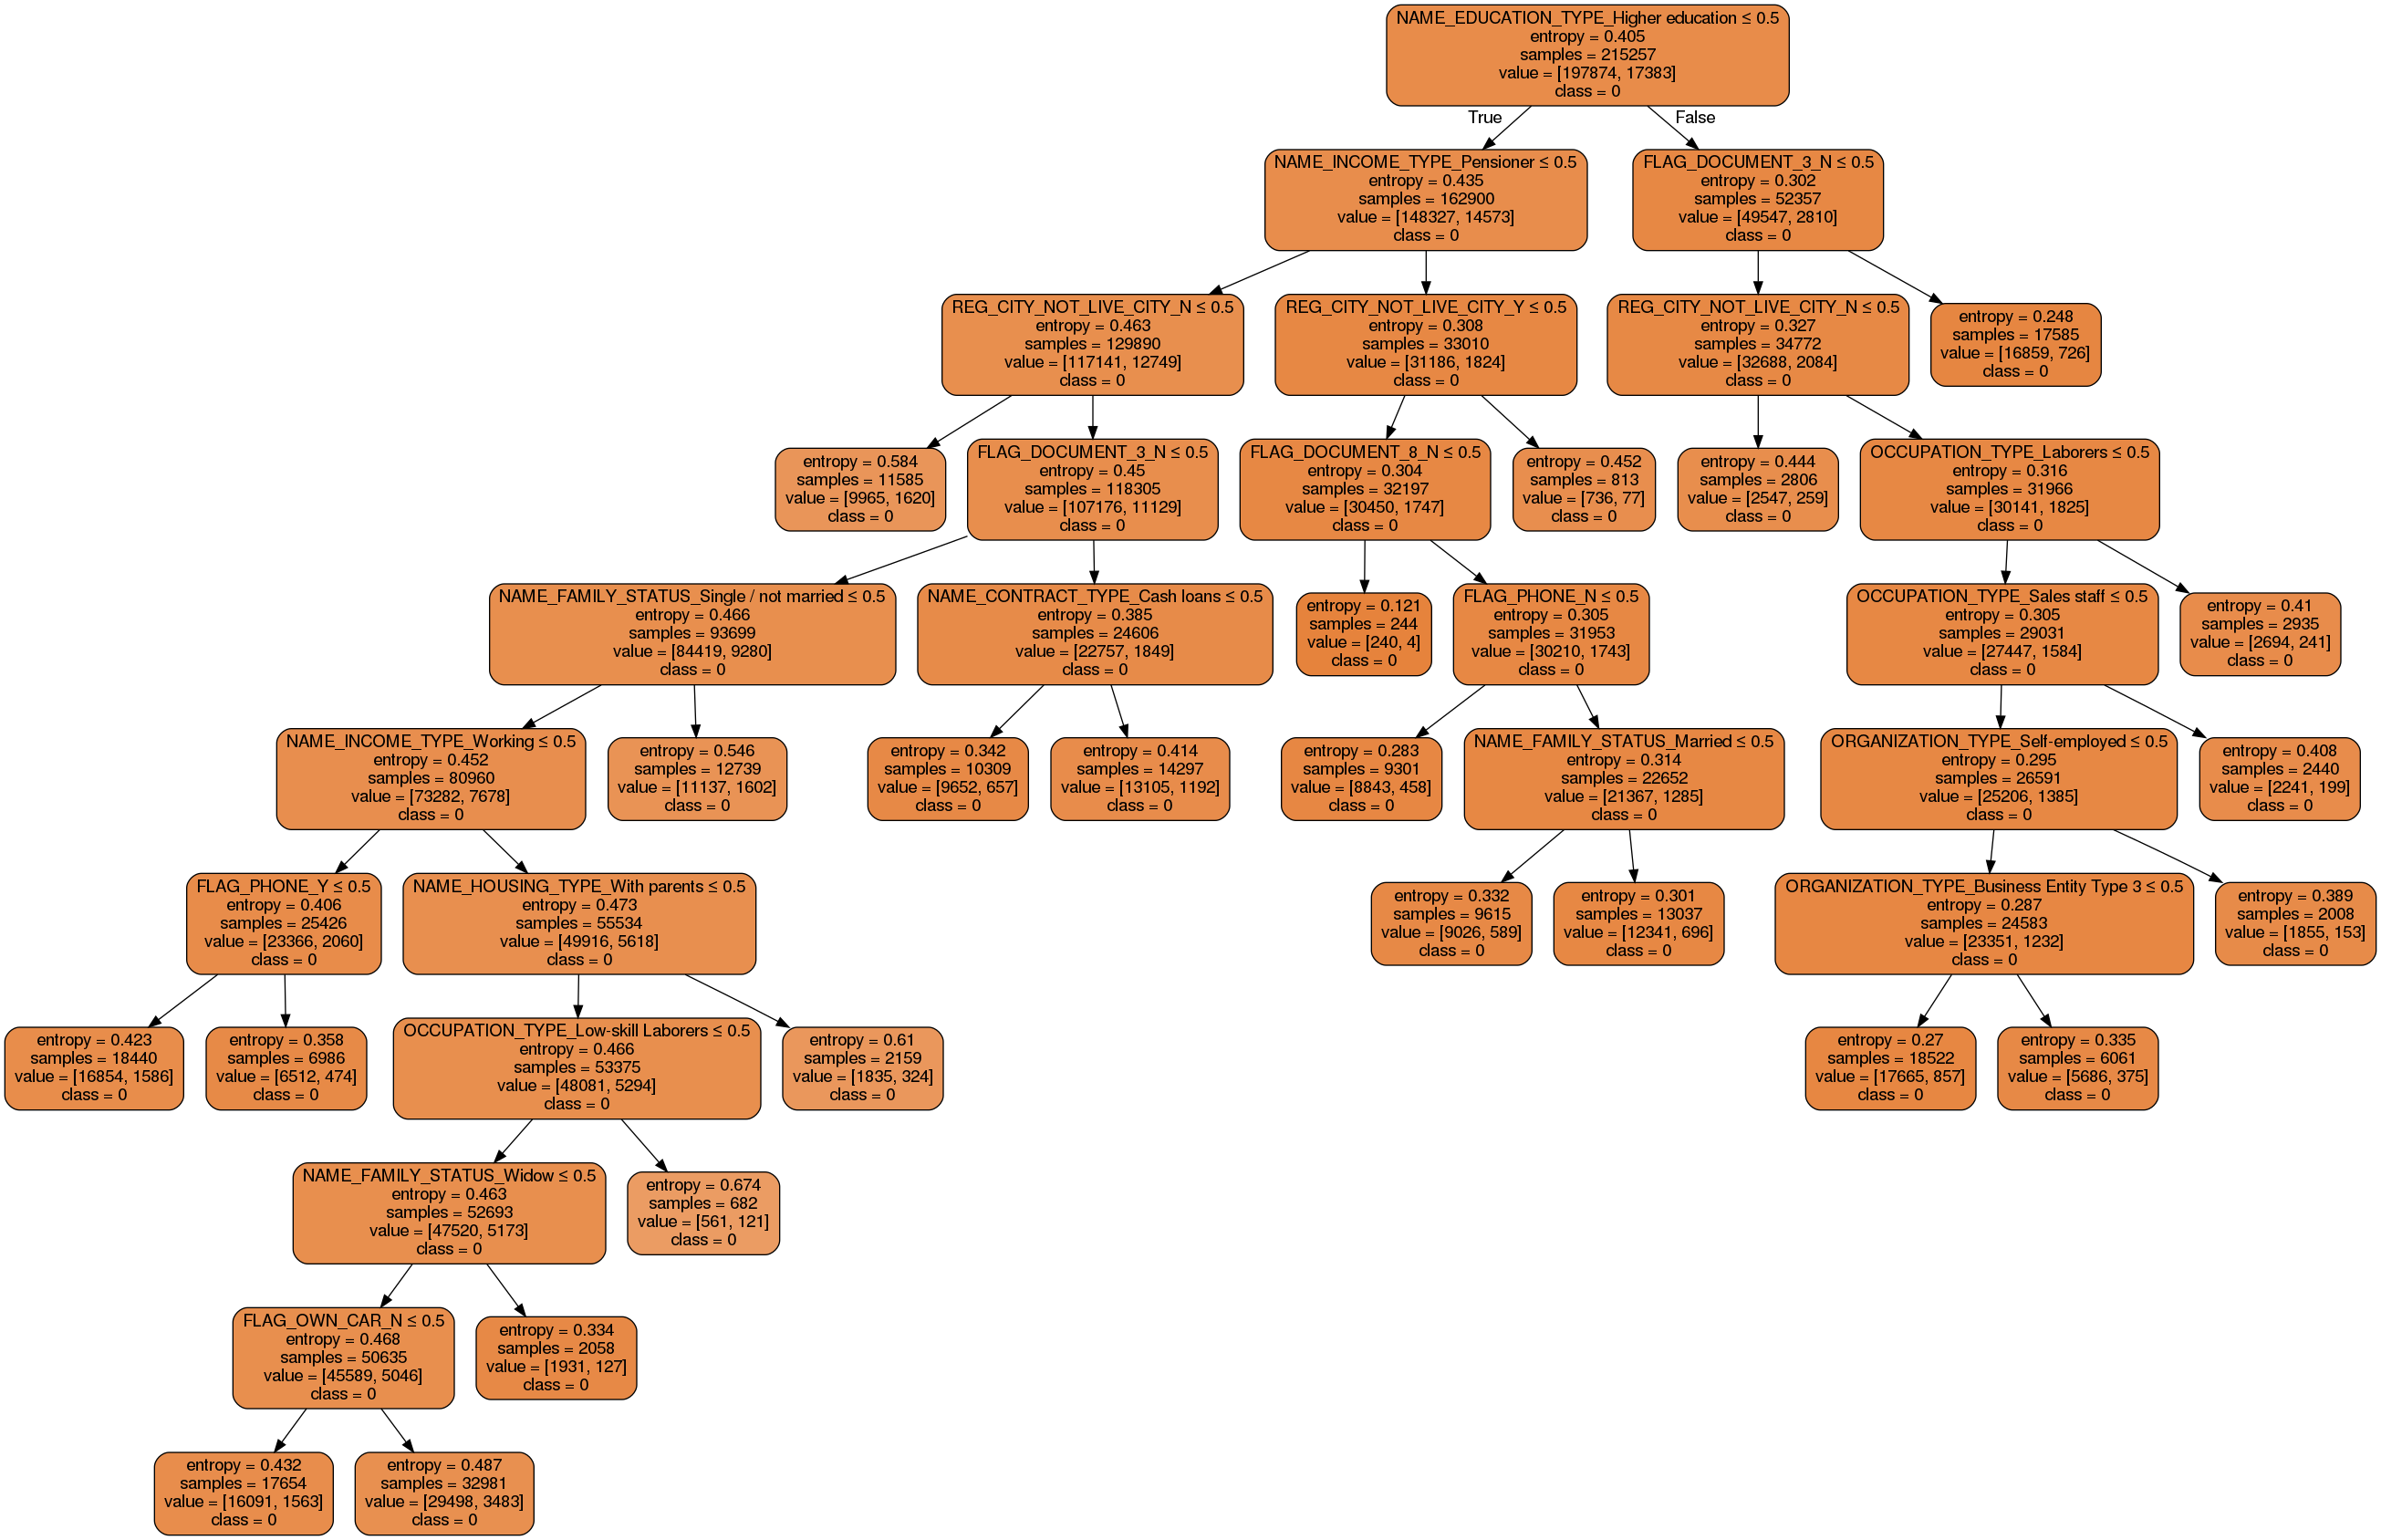

In [137]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
pd.options.display.max_rows = 4000
dot_data = StringIO()
export_graphviz(bigtree_fit, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X1cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('loans.png')
Image(graph.create_png())

In [ ]:
from project_code.cleaning import (downsampling_strategy, reduce_mem_usage)
df_char_encode = reduce_mem_usage(df_char_encode).astype('int8')

Reduce Memory Usage, Downsample:

In [33]:
from project_code.cleaning import (downsampling_strategy, reduce_mem_usage)

In [34]:
df_char_encode = reduce_mem_usage(df_char_encode).astype('int8')

Memory usage of dataframe is 31.12 MB
Memory usage after optimization is: 57.23 MB
Decreased by -83.9%


In [35]:
df_char_encode.shape

(228167, 128)

In [36]:
df_char_encode.dtypes

TARGET                                int8
NAME_CONTRACT_TYPE_Cash loans         int8
NAME_CONTRACT_TYPE_Revolving loans    int8
FLAG_OWN_CAR_N                        int8
FLAG_OWN_CAR_Y                        int8
                                      ... 
FLAG_DOCUMENT_19_Y                    int8
FLAG_DOCUMENT_20_N                    int8
FLAG_DOCUMENT_20_Y                    int8
FLAG_DOCUMENT_21_N                    int8
FLAG_DOCUMENT_21_Y                    int8
Length: 128, dtype: object

In [37]:
#df_char_encode['TARGET'] = df_char_encode.TARGET.astype('category')
y = df_char_encode['TARGET']
X = df_char_encode.drop(['TARGET'], axis=1)

In [38]:
pd.options.display.max_columns = None
df_char_encode.head()

,TARGET,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family and Groups of People,NAME_TYPE_SUITE_Other,NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Not_Working,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher Education,NAME_EDUCATION_TYPE_Secondary Education,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Not Married,NAME_FAMILY_STATUS_Unknown,NAME_HOUSING_TYPE_Apartment,NAME_HOUSING_TYPE_Co-Habitation,NAME_HOUSING_TYPE_House or Condo,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Public Housing,FLAG_MOBIL_Y,FLAG_EMP_PHONE_N,FLAG_EMP_PHONE_Y,FLAG_WORK_PHONE_N,FLAG_WORK_PHONE_Y,FLAG_CONT_MOBILE_N,FLAG_CONT_MOBILE_Y,FLAG_PHONE_N,FLAG_PHONE_Y,FLAG_EMAIL_N,FLAG_EMAIL_Y,OCCUPATION_TYPE_High Skilled Workers & Management,OCCUPATION_TYPE_Low Skilled Workers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_None,OCCUPATION_TYPE_Pensioner,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Security staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,REG_REGION_NOT_LIVE_REGION_N,REG_REGION_NOT_LIVE_REGION_Y,REG_REGION_NOT_WORK_REGION_N,REG_REGION_NOT_WORK_REGION_Y,LIVE_REGION_NOT_WORK_REGION_N,LIVE_REGION_NOT_WORK_REGION_Y,REG_CITY_NOT_LIVE_CITY_N,REG_CITY_NOT_LIVE_CITY_Y,REG_CITY_NOT_WORK_CITY_N,REG_CITY_NOT_WORK_CITY_Y,LIVE_CITY_NOT_WORK_CITY_N,LIVE_CITY_NOT_WORK_CITY_Y,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Business Sector,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_None,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade,ORGANIZATION_TYPE_Transport,ORGANIZATION_TYPE_University,FLAG_DOCUMENT_2_N,FLAG_DOCUMENT_2_Y,FLAG_DOCUMENT_3_N,FLAG_DOCUMENT_3_Y,FLAG_DOCUMENT_4_N,FLAG_DOCUMENT_4_Y,FLAG_DOCUMENT_5_N,FLAG_DOCUMENT_5_Y,FLAG_DOCUMENT_6_N,FLAG_DOCUMENT_6_Y,FLAG_DOCUMENT_7_N,FLAG_DOCUMENT_7_Y,FLAG_DOCUMENT_8_N,FLAG_DOCUMENT_8_Y,FLAG_DOCUMENT_9_N,FLAG_DOCUMENT_9_Y,FLAG_DOCUMENT_10_N,FLAG_DOCUMENT_10_Y,FLAG_DOCUMENT_11_N,FLAG_DOCUMENT_11_Y,FLAG_DOCUMENT_12_N,FLAG_DOCUMENT_12_Y,FLAG_DOCUMENT_13_N,FLAG_DOCUMENT_13_Y,FLAG_DOCUMENT_14_N,FLAG_DOCUMENT_14_Y,FLAG_DOCUMENT_15_N,FLAG_DOCUMENT_15_Y,FLAG_DOCUMENT_16_N,FLAG_DOCUMENT_16_Y,FLAG_DOCUMENT_17_N,FLAG_DOCUMENT_17_Y,FLAG_DOCUMENT_18_N,FLAG_DOCUMENT_18_Y,FLAG_DOCUMENT_19_N,FLAG_DOCUMENT_19_Y,FLAG_DOCUMENT_20_N,FLAG_DOCUMENT_20_Y,FLAG_DOCUMENT_21_N,FLAG_DOCUMENT_21_Y
0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
2,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
3,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
6,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0

In [39]:
#*************************************#
#**** Downsampling for Efficiency ****#
#*************************************#

def downsampling_strategy(X, y):
    import numpy as np
    y.columns = ['TARGET']
    X = X.copy(deep=True)
    y = y.copy(deep=True)
    y = y.to_frame(name = 'TARGET')
    random_state = 1
    # balancing the training set
    df = pd.concat([X, y], axis =1)
    defaults = df[df['TARGET'] == 1]
    nominal = df[df['TARGET'] == 0].sample(
        n = np.round(0.5 * (defaults.TARGET.size / 0.5)).astype(int), random_state = random_state)
    # join dataframes and shuffle
    df = pd.concat([defaults, nominal]).sample(frac = 1, random_state = random_state)
    return df

df_downsampled = downsampling_strategy(X, y)

print('Final Data shape: ', df_downsampled.shape,
     'Percent defaults: ', df_downsampled[df_downsampled['TARGET'] == 1].shape[0] / df_downsampled.shape[0])

Final Data shape:  (37804, 128) Percent defaults:  0.5


In [40]:
df_downsampled.head()

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family and Groups of People,NAME_TYPE_SUITE_Other,NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Not_Working,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher Education,NAME_EDUCATION_TYPE_Secondary Education,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Not Married,NAME_FAMILY_STATUS_Unknown,NAME_HOUSING_TYPE_Apartment,NAME_HOUSING_TYPE_Co-Habitation,NAME_HOUSING_TYPE_House or Condo,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Public Housing,FLAG_MOBIL_Y,FLAG_EMP_PHONE_N,FLAG_EMP_PHONE_Y,FLAG_WORK_PHONE_N,FLAG_WORK_PHONE_Y,FLAG_CONT_MOBILE_N,FLAG_CONT_MOBILE_Y,FLAG_PHONE_N,FLAG_PHONE_Y,FLAG_EMAIL_N,FLAG_EMAIL_Y,OCCUPATION_TYPE_High Skilled Workers & Management,OCCUPATION_TYPE_Low Skilled Workers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_None,OCCUPATION_TYPE_Pensioner,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Security staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,REG_REGION_NOT_LIVE_REGION_N,REG_REGION_NOT_LIVE_REGION_Y,REG_REGION_NOT_WORK_REGION_N,REG_REGION_NOT_WORK_REGION_Y,LIVE_REGION_NOT_WORK_REGION_N,LIVE_REGION_NOT_WORK_REGION_Y,REG_CITY_NOT_LIVE_CITY_N,REG_CITY_NOT_LIVE_CITY_Y,REG_CITY_NOT_WORK_CITY_N,REG_CITY_NOT_WORK_CITY_Y,LIVE_CITY_NOT_WORK_CITY_N,LIVE_CITY_NOT_WORK_CITY_Y,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Business Sector,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_None,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade,ORGANIZATION_TYPE_Transport,ORGANIZATION_TYPE_University,FLAG_DOCUMENT_2_N,FLAG_DOCUMENT_2_Y,FLAG_DOCUMENT_3_N,FLAG_DOCUMENT_3_Y,FLAG_DOCUMENT_4_N,FLAG_DOCUMENT_4_Y,FLAG_DOCUMENT_5_N,FLAG_DOCUMENT_5_Y,FLAG_DOCUMENT_6_N,FLAG_DOCUMENT_6_Y,FLAG_DOCUMENT_7_N,FLAG_DOCUMENT_7_Y,FLAG_DOCUMENT_8_N,FLAG_DOCUMENT_8_Y,FLAG_DOCUMENT_9_N,FLAG_DOCUMENT_9_Y,FLAG_DOCUMENT_10_N,FLAG_DOCUMENT_10_Y,FLAG_DOCUMENT_11_N,FLAG_DOCUMENT_11_Y,FLAG_DOCUMENT_12_N,FLAG_DOCUMENT_12_Y,FLAG_DOCUMENT_13_N,FLAG_DOCUMENT_13_Y,FLAG_DOCUMENT_14_N,FLAG_DOCUMENT_14_Y,FLAG_DOCUMENT_15_N,FLAG_DOCUMENT_15_Y,FLAG_DOCUMENT_16_N,FLAG_DOCUMENT_16_Y,FLAG_DOCUMENT_17_N,FLAG_DOCUMENT_17_Y,FLAG_DOCUMENT_18_N,FLAG_DOCUMENT_18_Y,FLAG_DOCUMENT_19_N,FLAG_DOCUMENT_19_Y,FLAG_DOCUMENT_20_N,FLAG_DOCUMENT_20_Y,FLAG_DOCUMENT_21_N,FLAG_DOCUMENT_21_Y,TARGET
223327,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0
164835,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1
266813,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1
282968,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,1

In [ ]:
# import re
# df_char_encode01 = df_char_encode[df_char_encode.columns.drop(list(df_char_encode.filter(regex='FLAG_DOCUMENT_21_')))]
# df_char_encode01 = df_downsampled[df_downsampled.columns.drop(list(df_downsampled.filter(regex='FLAG_DOCUMENT')))]

In [ ]:
#df_char_encode01.shape

In [51]:
df_non_defaulted = df_downsampled[df_downsampled['TARGET'] == 0]
df_defaulted = df_downsampled[df_downsampled['TARGET'] == 1]

In [52]:
df_non_defaulted_final = df_non_defaulted.drop(['TARGET'], axis=1)
df_defaulted_final = df_defaulted.drop(['TARGET'], axis=1)

In [53]:
df_non_defaulted_final01 = df_non_defaulted_final

In [54]:
df_non_defaulted_final01 = df_non_defaulted_final01.applymap(lambda x: True if x==1 else x)
df_non_defaulted_final01 = df_non_defaulted_final01.applymap(lambda x: False if x==0 else x)

In [55]:
df_non_defaulted_final01.head()

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family and Groups of People,NAME_TYPE_SUITE_Other,NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Not_Working,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary Education,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Not Married,NAME_FAMILY_STATUS_Unknown,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,FLAG_MOBIL_N,FLAG_MOBIL_Y,FLAG_EMP_PHONE_N,FLAG_EMP_PHONE_Y,FLAG_WORK_PHONE_N,FLAG_WORK_PHONE_Y,FLAG_CONT_MOBILE_N,FLAG_CONT_MOBILE_Y,FLAG_PHONE_N,FLAG_PHONE_Y,FLAG_EMAIL_N,FLAG_EMAIL_Y,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_High Skilled Workers & Management,OCCUPATION_TYPE_Low Skilled Workers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_None,OCCUPATION_TYPE_Pensioner,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Unknown,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,REG_REGION_NOT_LIVE_REGION_N,REG_REGION_NOT_LIVE_REGION_Y,REG_REGION_NOT_WORK_REGION_N,REG_REGION_NOT_WORK_REGION_Y,LIVE_REGION_NOT_WORK_REGION_N,LIVE_REGION_NOT_WORK_REGION_Y,REG_CITY_NOT_LIVE_CITY_N,REG_CITY_NOT_LIVE_CITY_Y,REG_CITY_NOT_WORK_CITY_N,REG_CITY_NOT_WORK_CITY_Y,LIVE_CITY_NOT_WORK_CITY_N,LIVE_CITY_NOT_WORK_CITY_Y,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Business Sector,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_None,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade,ORGANIZATION_TYPE_Transport,ORGANIZATION_TYPE_University,FLAG_DOCUMENT_2_N,FLAG_DOCUMENT_2_Y,FLAG_DOCUMENT_3_N,FLAG_DOCUMENT_3_Y,FLAG_DOCUMENT_4_N,FLAG_DOCUMENT_4_Y,FLAG_DOCUMENT_5_N,FLAG_DOCUMENT_5_Y,FLAG_DOCUMENT_6_N,FLAG_DOCUMENT_6_Y,FLAG_DOCUMENT_7_N,FLAG_DOCUMENT_7_Y,FLAG_DOCUMENT_8_N,FLAG_DOCUMENT_8_Y,FLAG_DOCUMENT_9_N,FLAG_DOCUMENT_9_Y,FLAG_DOCUMENT_10_N,FLAG_DOCUMENT_10_Y,FLAG_DOCUMENT_11_N,FLAG_DOCUMENT_11_Y,FLAG_DOCUMENT_12_N,FLAG_DOCUMENT_12_Y,FLAG_DOCUMENT_13_N,FLAG_DOCUMENT_13_Y,FLAG_DOCUMENT_14_N,FLAG_DOCUMENT_14_Y,FLAG_DOCUMENT_15_N,FLAG_DOCUMENT_15_Y,FLAG_DOCUMENT_16_N,FLAG_DOCUMENT_16_Y,FLAG_DOCUMENT_17_N,FLAG_DOCUMENT_17_Y,FLAG_DOCUMENT_18_N,FLAG_DOCUMENT_18_Y,FLAG_DOCUMENT_19_N,FLAG_DOCUMENT_19_Y,FLAG_DOCUMENT_20_N,FLAG_DOCUMENT_20_Y,FLAG_DOCUMENT_21_N,FLAG_DOCUMENT_21_Y
288063,True,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,True,True,False,False,True,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,

In [56]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(df_non_defaulted_final).transform(df_non_defaulted_final)
df_downcode_non_defaulted = pd.DataFrame(te_ary, columns=te.columns_) # Colnames need to be mapped back to the original one-hot encoded dataframe colnames

te = TransactionEncoder()
te_ary = te.fit(df_defaulted_final).transform(df_defaulted_final)
df_downcode_defaulted = pd.DataFrame(te_ary, columns=te.columns_) # Colnames here also need to be mapped back to the original one-hot encoded dataframe colnames

In [57]:
df_downcode_non_defaulted.head()

,,&,-,/,0,1,2,3,4,5,6,7,8,9,A,B,C,D,E,F,G,H,I,K,L,M,N,O,P,R,S,T,U,V,W,Y,Z,_,a,b,c,d,e,f,g,h,i,k,l,m,n,o,p,r,s,t,u,v,w,y
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,True,True,True,True,True,False,True,False,False,False,True,False,True,True,False,False,False,False,False,False,True,False,False,True,False,True,True,False,False,True,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,True,True,True,True,True,False,True,False,False,False,True,False,True,True,False,False,False,True,False,True,False,True,False,True,False,True,True,False,False,True,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,True,False,False,False,True,False,True,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,True,False,False,False,True,False,True,True,False,True,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,True,False,False,False,True,False,True,True,False,True,False,True,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [59]:
df_downcode_defaulted.shape

(24825, 60)

Because of the dimensions, inconsistencies, and randomness in the data, no itemsets were particularly common. At 1,000 samples, the highest support provided was 0.19. As the sample size increases, this volume drops significantly. To circumvent this issue, we built an iterative loop to process through all downsampled data of 49,650 observations for both defaulted and non-defaulted loans, calculating support for generated itemsets at 100-observation intervals.

In [60]:
for col in df_non_defaulted_final01:
    df_non_defaulted_final01[col] = df_non_defaulted_final01[col].astype(bool)

In [61]:
df_non_defaulted_final01.shape

(24825, 133)

In [ ]:
from mlxtend.frequent_patterns import fpgrowth

i = 0
j = 100
frame_non_defaulted = pd.DataFrame()

for code in range(0,len(df_non_defaulted_final01)):
    grow = fpgrowth(df_non_defaulted_final01[i:j], min_support=0.15, use_colnames=True, max_len = None, verbose=None)
    i=i+200
    j=j+200
    frame_non_defaulted = frame_non_defaulted.append(grow, ignore_index=True);

In [ ]:
frame_non_defaulted.head()

In [65]:
frame_non_defaulted3 = df_non_defaulted_final01.iloc[:,1:90]

In [69]:
frame_non_defaulted3.shape

(24825, 89)

In [66]:
frame_non_defaulted3.head()

,NAME_CONTRACT_TYPE_Revolving loans,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family and Groups of People,NAME_TYPE_SUITE_Other,NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Not_Working,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary Education,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Not Married,NAME_FAMILY_STATUS_Unknown,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,FLAG_MOBIL_N,FLAG_MOBIL_Y,FLAG_EMP_PHONE_N,FLAG_EMP_PHONE_Y,FLAG_WORK_PHONE_N,FLAG_WORK_PHONE_Y,FLAG_CONT_MOBILE_N,FLAG_CONT_MOBILE_Y,FLAG_PHONE_N,FLAG_PHONE_Y,FLAG_EMAIL_N,FLAG_EMAIL_Y,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_High Skilled Workers & Management,OCCUPATION_TYPE_Low Skilled Workers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_None,OCCUPATION_TYPE_Pensioner,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Unknown,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,REG_REGION_NOT_LIVE_REGION_N,REG_REGION_NOT_LIVE_REGION_Y,REG_REGION_NOT_WORK_REGION_N,REG_REGION_NOT_WORK_REGION_Y,LIVE_REGION_NOT_WORK_REGION_N,LIVE_REGION_NOT_WORK_REGION_Y,REG_CITY_NOT_LIVE_CITY_N,REG_CITY_NOT_LIVE_CITY_Y,REG_CITY_NOT_WORK_CITY_N,REG_CITY_NOT_WORK_CITY_Y,LIVE_CITY_NOT_WORK_CITY_N,LIVE_CITY_NOT_WORK_CITY_Y,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Business Sector,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_None,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom
288063,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,True,True,False,False,True,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
38368,False,True,False,True,False,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False,True,False,True,True,False,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True,True,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
39900,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,True,True,False,False,True,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,True,False,True,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,Fa

In [62]:
from mlxtend.frequent_patterns import fpgrowth

i = 0
j = 100
frame_non_defaulted = pd.DataFrame()

for code in range(0,len(df_downcode_non_defaulted)):
    grow = fpgrowth(df_downcode_non_defaulted[i:j], min_support=0.35, use_colnames=True, max_len = None, verbose=None)
    i=i+200
    j=j+200
    frame_non_defaulted = frame_non_defaulted.append(grow, ignore_index=True);

In [68]:
df_downcode_non_defaulted.shape

(24825, 60)

In [64]:
frame_non_defaulted.head()

,support,itemsets
0,1.00,(_)
1,0.96,(E)
2,0.94,(N)
3,0.93,(O)
4,0.88,(T)


In [72]:
print(fpgrowth(frame_non_defaulted3, min_support=0.35, use_colnames=True, max_len = None, verbose=None).head(25))

        support                                           itemsets
0      1.000000                                     (FLAG_MOBIL_Y)
1      0.998429                               (FLAG_CONT_MOBILE_Y)
2      0.985942                     (REG_REGION_NOT_LIVE_REGION_N)
3      0.958832                    (LIVE_REGION_NOT_WORK_REGION_N)
4      0.949325                     (REG_REGION_NOT_WORK_REGION_N)
...         ...                                                ...
23995  0.364068  (LIVE_REGION_NOT_WORK_REGION_N, FLAG_CONT_MOBI...
23996  0.364068  (LIVE_REGION_NOT_WORK_REGION_N, FLAG_CONT_MOBI...
23997  0.365358  (LIVE_REGION_NOT_WORK_REGION_N, REG_CITY_NOT_L...
23998  0.365317  (REG_CITY_NOT_LIVE_CITY_N, LIVE_REGION_NOT_WOR...
23999  0.364713  (REG_CITY_NOT_LIVE_CITY_N, LIVE_REGION_NOT_WOR...

[24000 rows x 2 columns]


In [26]:
frame_non_defaulted2 = frame_non_defaulted

In [27]:
frame_non_defaulted2 = pd.DataFrame(frame_non_defaulted2)

In [28]:
#frame_non_defaulted2[support > 0.7]
frame_non_defaulted2_final = frame_non_defaulted2[(frame_non_defaulted2.support > 0.85)].sort_values(by='support', ascending=False)
print(frame_non_defaulted2_final.to_string(index=False))

 support   itemsets
    1.00        (_)
    0.96     (E, _)
    0.96        (E)
    0.94        (N)
    0.94     (_, N)
    0.91  (E, _, N)
    0.91     (E, N)
    0.88        (Y)
    0.88     (Y, _)
    0.87        (O)
    0.87     (_, O)
    0.86        (T)
    0.86        (A)
    0.86     (Y, E)
    0.86  (Y, E, _)
    0.86     (A, _)
    0.86     (E, T)
    0.86     (T, _)
    0.86  (E, T, _)


In [29]:
FRAME = pd.DataFrame(frame_non_defaulted2)

In [33]:
frame_non_defaulted2 = pd.DataFrame(frame_non_defaulted2)

In [30]:
frame_non_defaulted2 = frame_non_defaulted2.groupby('itemsets')

In [ ]:
frame_non_defaulted2.groupby('itemsets').agg({'cnt': 'sum','support':'mean'}).sort('support')

In [ ]:
pd.options.display.max_rows = None
frame_non_defaulted2.apply(sort_values(['support'], ascending=[1,0])).head()

In [ ]:
frame_non_defaulted2.sort_values(by=['itemsets','support','cnt'], inplace=True)

In [35]:
frame_non_defaulted.head(20)

,support,itemsets
0,1.00,(_)
1,0.96,(E)
2,0.94,(N)
3,0.88,(Y)
4,0.87,(O)
5,0.86,(A)
6,0.86,(T)
7,0.70,(P)
8,0.60,(C)
9,0.46,(M)


In [ ]:
frame_non_defaulted2['itemsets','support','cnt'].groupby('itemsets')

In [ ]:
frame_non_defaulted2.head()

In [ ]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
from sqlalchemy import create_engine

q = """
       SELECT X.itemset AS itemset, AVG(X.support) as mean_support, SUM(X.cnt) as itemset_occurrence_count
       FROM (
           SELECT T.support AS support, T.itemset AS itemset, "1" AS cnt
           FROM (SELECT support, itemset
                 FROM frame_non_defaulted2
                 group by itemset, support
                 order by support desc
                 ) AS T
            GROUP BY T.support, T.itemset
            ) AS X
        GROUP BY X.itemset
        ORDER BY AVG(X.count) desc, SUM(X.cnt) desc;
    """

print(pysqldf(q).head())

In [ ]:
print(ps.sqldf(q1, locals()))

In [ ]:
frame_non_defaulted2.head(25)

In [ ]:
from mlxtend.frequent_patterns import fpgrowth

n = 0
m = 100
frame_defaulted = pd.DataFrame()

for code in range(0,len(df_downcode_defaulted)):
    grow = fpgrowth(df_downcode_defaulted[n:m], min_support=0.35, use_colnames=True, max_len = None, verbose=None)
    n=n+200
    m=m+200
    frame_defaulted = frame_defaulted.append(grow, ignore_index=True)

I need to now order these by itemsets, then average the support within each itemset grouping to get the average support.

In [ ]:
frame_defaulted.head(51)

In [ ]:
grow.shape

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(df_chars).transform(df_chars)
df_chars = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
from mlxtend.frequent_patterns import apriori
# Time it takes to run apriori (neat little fact):
%timeit -n 100 -r 10 apriori(df_downcode_defaulted03, min_support=0.6)

In [ ]:
from mlxtend.frequent_patterns import fpgrowth
# Time it takes to run fp growth (also a neat little fact, which is a reason for choosing fp growth):
%timeit -n 100 -r 10 fpgrowth(df_downcode_defaulted03, min_support=0.6)

In [ ]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
from mlxtend.frequent_patterns import fpgrowth
fpgrowth(df, min_support=0.8)

In [ ]:
df #looksee the column names are there because the dataframe has a practical (maybe determined in the byte code translation, not sure yet) number of columns.

In [ ]:
#*******************************************************************************************************************************#
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ Toolbox of Useful Tricks. $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$#
#*******************************************************************************************************************************#

In [ ]:
#pd.options.display.max_rows = None
#pd.options.display.max_columns = None